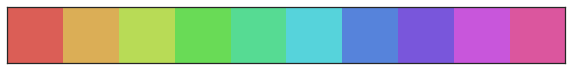

In [506]:
%matplotlib inline
import os 
import numpy as np
import nibabel as nb 
from numpy import mean, std
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
from nilearn.plotting import plot_anat
plt.rcParams['font.family'] = 'Myriad Pro'
sns.set_style('white')

datadir = '/Users/kanaan/Google Drive/TS-EUROTRAIN/Presentations/2016_06_ESSTS_warsaw_QSM'

#Spectral, summer, coolwarm, Wistia_r, pink_r, Set1, Set2, 
#Set3, brg_r, Dark2, prism, PuOr_r, afmhot_r, terrain_r, 
#PuBuGn_r, RdPu, gist_ncar_r, gist_yarg_r, Dark2_r, YlGnBu, 
#RdYlBu, hot_r, gist_rainbow_r, gist_stern, PuBu_r, cool_r,
#cool, gray, copper_r, Greens_r, GnBu, gist_ncar, spring_r, 
#gist_rainbow, gist_heat_r, Wistia, OrRd_r, CMRmap, bone, 
#gist_stern_r, RdYlGn, Pastel2_r, spring, terrain, YlOrRd_r, 
#Set2_r, winter_r, PuBu, RdGy_r, spectral, rainbow, flag_r, 
#jet_r, RdPu_r, gist_yarg, BuGn, Paired_r, hsv_r, bwr, cubehelix, 
#Greens, PRGn, gist_heat, spectral_r, Paired, hsv, Oranges_r, 
#prism_r, Pastel2, Pastel1_r, Pastel1, gray_r, jet, Spectral_r, 
#gnuplot2_r, gist_earth, YlGnBu_r, copper, gist_earth_r, Set3_r, OrRd, 
#gnuplot_r, ocean_r, brg, gnuplot2, PuRd_r, bone_r, BuPu, Oranges, RdYlGn_r, 
#PiYG, CMRmap_r, YlGn, binary_r, gist_gray_r, Accent, BuPu_r, gist_gray, flag, 
#bwr_r, RdBu_r, BrBG, Reds, Set1_r, summer_r, GnBu_r, BrBG_r, Reds_r, RdGy,
#PuRd, Accent_r, Blues, autumn_r, autumn, cubehelix_r, nipy_spectral_r, 
#ocean, PRGn_r, Greys_r, pink, binary, winter, gnuplot, RdYlBu_r, hot, 
#YlOrBr, coolwarm_r, rainbow_r, Purples_r, PiYG_r, YlGn_r, Blues_r, 
#YlOrBr_r, seismic, Purples, seismic_r, RdBu, Greys, BuGn_r, YlOrRd,
#PuOr, PuBuGn, nipy_spectral, afmhot

palette = sns.color_palette("hls", 10)
sns.palplot(sns.color_palette("hls",10 ))

In [507]:
qsm = np.rot90(nb.load(os.path.join(datadir, 'REG', 'QSM_norm.nii.gz')).get_data()) * - 100
uni = np.rot90(nb.load(os.path.join(datadir, 'REG', 'MP2RAGE2FLASH_BRAIN.nii.gz')).get_data())/  350


In [508]:
def plot_nucleus(img, nucleus,Zcut, cmap, alpha, segmentation):
    
    if segmentation == 'Brainstem':
        left  = nb.load(os.path.join(datadir, 'REG','L_%s.nii.gz')%nucleus).get_data()
        right = nb.load(os.path.join(datadir, 'REG','R_%s.nii.gz')%nucleus).get_data()
        data = np.rot90(left + right)
    elif segmentation == 'BasalGanglia':
        left  = nb.load(os.path.join(datadir, 'REG','FIRST_HYBRID-L_%s_first_thr.nii.gz')%nucleus).get_data()
        right = nb.load(os.path.join(datadir, 'REG','FIRST_HYBRID-R_%s_first_thr.nii.gz')%nucleus).get_data()
        data = np.rot90(left + right)
    elif segmentation == 'Full':
        data  = nb.load(os.path.join(datadir, 'REG','%s.nii.gz')%nucleus).get_data()
        data = np.rot90(data)
        
    data[data==0] = np.nan
    
    fig = plt.figure()
    fig.set_size_inches(10,8)
    ax = plt.axes(frameon=False)
    plt.imshow(img[:,:,Zcut], interpolation= None, alpha = 1)#,vmin = -.5, vmax = 0.5)
    plt.imshow(uni[:,:,Zcut], interpolation= None, alpha = 0.35)#,vmin = -.5, vmax = 0.5)
    plt.imshow(data[:,:,Zcut], interpolation= None,cmap=cmap, alpha = alpha)
    plt.xlim(35, 170)
    plt.ylim(220,50)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    
    plt.savefig(os.path.join(datadir, 'PLOT_nuclei','%s.png'%nucleus),dpi = 600, bbox_inches='tight')


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


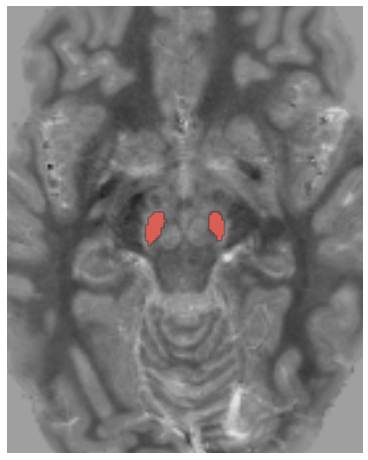

In [509]:
plot_nucleus(qsm, 'SN', '50', colors.ListedColormap([palette[0]]), alpha= 1, segmentation = 'Brainstem')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


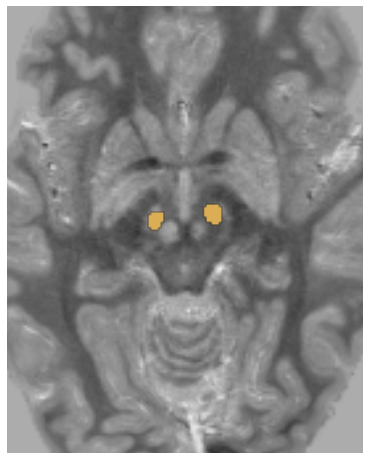

In [510]:
plot_nucleus(qsm, 'STN', '54', colors.ListedColormap([palette[1]]), alpha= None, segmentation = 'Brainstem')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


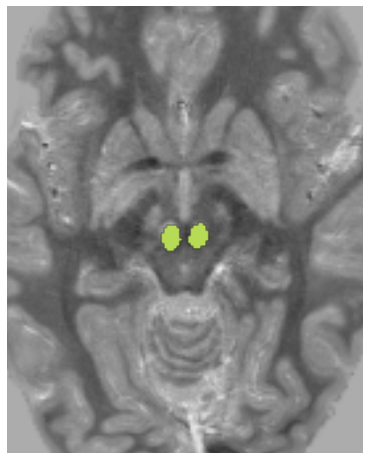

In [511]:
plot_nucleus(qsm, 'RN', '54', colors.ListedColormap([palette[2]]), alpha= None, segmentation = 'Brainstem')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


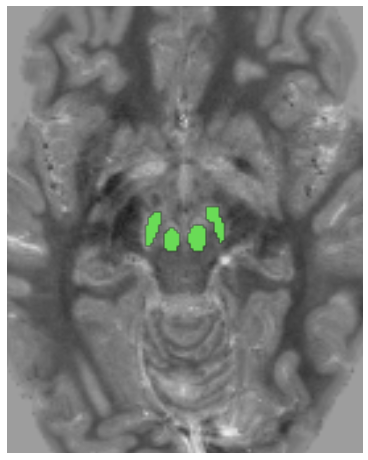

In [512]:
plot_nucleus(qsm, 'BrainStem', '51', colors.ListedColormap([palette[3]]), alpha= None, segmentation = 'Full')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


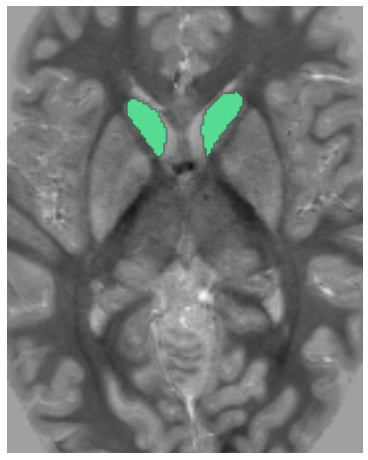

In [513]:
plot_nucleus(qsm, 'Caud', '62', colors.ListedColormap([palette[4]]), alpha= None, segmentation = 'BasalGanglia')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


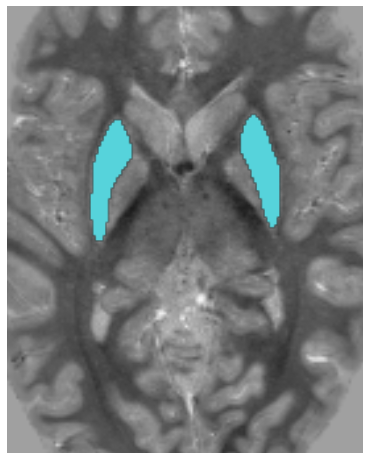

In [514]:
plot_nucleus(qsm, 'Puta', '63', colors.ListedColormap([palette[5]]), alpha= None, segmentation = 'BasalGanglia')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


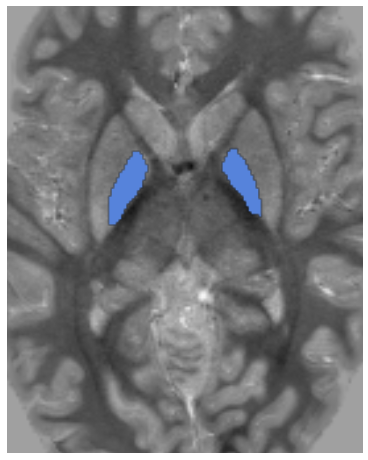

In [515]:
plot_nucleus(qsm, 'Pall', '62', colors.ListedColormap([palette[6]]), alpha= None, segmentation = 'BasalGanglia')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


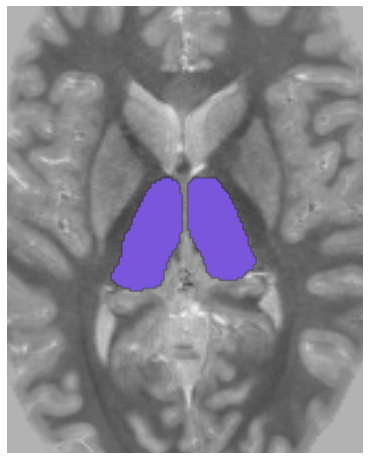

In [516]:
plot_nucleus(qsm, 'Thal', '66', colors.ListedColormap([palette[7]]), alpha= None, segmentation = 'BasalGanglia')    

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


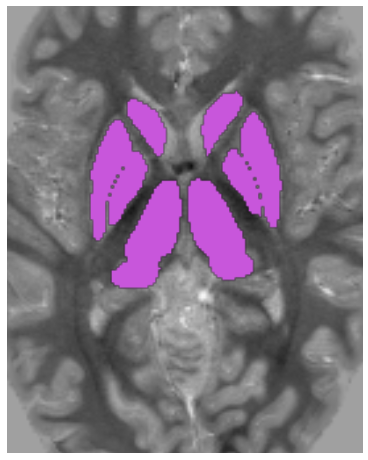

In [517]:
plot_nucleus(qsm, 'BasalGanglia', '62', colors.ListedColormap([palette[8]]), alpha= None, segmentation = 'Full')    